In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import matplotlib.cm as cm

cmap = plt.colormaps["tab20c"]  # 3 代表你想要的色票數量

# 定义颜色变量
color1, color2, color3, color4, color5 = cmap(0), cmap(1), cmap(2), cmap(3), cmap(4)
color6, color7, color8, color9, color10 = cmap(5), cmap(6), cmap(7), cmap(8), cmap(9)
color11, color12, color13, color14, color15 = (
    cmap(10),
    cmap(11),
    cmap(12),
    cmap(13),
    cmap(14),
)
color16, color17, color18, color19, color20 = (
    cmap(15),
    cmap(16),
    cmap(17),
    cmap(18),
    cmap(19),
)

# 讀取資料
df = pd.read_csv(r"../../../../csv/房價_add南科and股價.csv")

# 處理時間特徵
df["交易年月日"] = pd.to_datetime(df["交易年月日"])
df = df.sort_values("交易年月日")
df["year"] = df["交易年月日"].dt.year
df["month"] = df["交易年月日"].dt.month

# 數值特徵與目標變數
numerical_features = [
    "建物移轉總面積平方公尺",
    "建物現況格局-房",
    "建物現況格局-廳",
    "建物現況格局-衛",
    "建物現況格局-隔間",
    "屋齡",
    # "stockTW",
    "KDE_1km",
    "good_count_0_500",
    "good_count_500_1000",
    "good_count_1000_1500",
    "bad_count_0_500",
    "bad_count_500_1000",
    "bad_count_1000_1500",
    "year",
    "month",
]
one_hot_features = [
    "建築型態_住商大樓",
    "建築型態_公寓",
    "建築型態_其他",
    "建築型態_透天厝",
    "是否包含車位",
    "建材_磚石",
    "建材_鋼筋",
    "建材_鋼骨",
    "建材_竹木",
    "鄉鎮_七股區",
    "鄉鎮_下營區",
    "鄉鎮_中西區",
    "鄉鎮_仁德區",
    "鄉鎮_佳里區",
    "鄉鎮_六甲區",
    "鄉鎮_北區",
    "鄉鎮_北門區",
    "鄉鎮_南化區",
    "鄉鎮_南區",
    "鄉鎮_善化區",
    "鄉鎮_大內區",
    "鄉鎮_學甲區",
    "鄉鎮_安南區",
    "鄉鎮_安定區",
    "鄉鎮_安平區",
    "鄉鎮_官田區",
    "鄉鎮_將軍區",
    "鄉鎮_山上區",
    "鄉鎮_左鎮區",
    "鄉鎮_後壁區",
    "鄉鎮_新化區",
    "鄉鎮_新市區",
    "鄉鎮_新營區",
    "鄉鎮_東區",
    "鄉鎮_東山區",
    "鄉鎮_柳營區",
    "鄉鎮_楠西區",
    "鄉鎮_歸仁區",
    "鄉鎮_永康區",
    "鄉鎮_玉井區",
    "鄉鎮_白河區",
    "鄉鎮_西港區",
    "鄉鎮_關廟區",
    "鄉鎮_鹽水區",
    "鄉鎮_麻豆區",
    "鄉鎮_龍崎區",
]

# 目標變數
target_feature = ["單價元每坪"]

# 資料篩選並進行 One-Hot 編碼
X_numerical = df[numerical_features]
X_one_hot = df[one_hot_features]

# 合併數值與 One-Hot 特徵
X = pd.concat([X_numerical, X_one_hot], axis=1)
y = df[target_feature].values

# 標準化處理
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

print(f"特徵資料大小: {X_scaled.shape}, 目標變數大小: {y_scaled.shape}")

# 分割訓練集與測試集
x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, shuffle=True, random_state=42
)

print("x_train.shape = ", x_train.shape)
print("y_train.shape = ", y_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_test.shape = ", y_test.shape)

C:\Users\g44889g\AppData\Local\Temp\ipykernel_22024\3244323800.py:30: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"../../../../csv/房價_add南科and股價.csv")


特徵資料大小: (201010, 61), 目標變數大小: (201010, 1)
x_train.shape =  (160808, 61)
y_train.shape =  (160808, 1)
x_test.shape =  (40202, 61)
y_test.shape =  (40202, 1)


In [39]:
# df[numerical_features].describe().to_csv(r'../../../../csv/model_input.csv', encoding='utf-8-sig')

# df[numerical_features].describe()

In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置字体为 Microsoft YaHei（微軟正黑體）

rcParams["font.sans-serif"] = ["Microsoft YaHei"]
rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 設定裝置
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# 定義 LSTM 模型
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout=0.2):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim  # 儲存 hidden_dim
        self.num_layers = num_layers  # 儲存 num_layers

        # LSTM 模組，加入 dropout
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        # Dropout 層
        self.dropout = nn.Dropout(dropout)
        # 全連接層
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # 初始化隱藏狀態和記憶狀態
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)

        # 前向傳播 LSTM
        out, _ = self.lstm(x, (h0, c0))
        # 應用 Dropout 層
        out = self.dropout(out[:, -1, :])  # 取最後一個時間步並使用 dropout
        # 透過全連接層輸出
        out = self.fc(out)
        return out


# 初始化模型
input_dim = x_train.shape[1]  # 修改為特徵的數量
hidden_dim = 64
num_layers = 2
output_dim = 1

# 建立模型、損失函數和優化器
model = LSTM(input_dim, hidden_dim, num_layers, output_dim).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.0001)

# 轉換資料為 Tensor
x_train_ = torch.FloatTensor(x_train).unsqueeze(1).to(device)  # 增加一個維度
y_train_ = torch.FloatTensor(y_train).to(device)
x_test_ = torch.FloatTensor(x_test).unsqueeze(1).to(device)
y_test_ = torch.FloatTensor(y_test).to(device)

# 建立 DataLoader
from torch.utils.data import TensorDataset, DataLoader

batch_size = 16
train_dataset = TensorDataset(x_train_, y_train_)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 訓練模型
num_epochs = 300
hist = []

# 訓練過程更新，加上 Validation Loss
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    # === 訓練過程 ===
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # 平均訓練損失
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # === 驗證過程 ===
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        # 在測試資料上計算 Validation Loss
        y_val_pred = model(x_test_)
        val_loss = criterion(y_val_pred, y_test_).item()

    val_losses.append(val_loss)

    # 每 10 個 epoch 打印一次損失
    if (epoch + 1) % 10 == 0:
        print(
            f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}"
        )

print("訓練完成！")

# === 繪製 Train Loss 和 Val Loss ===
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label="Train Loss", color=color1)
plt.plot(val_losses, label="Validation Loss", color=color5)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.legend()
plt.show()

Epoch 10/300, Train Loss: 0.0541, Val Loss: 0.0506


MAE: 0.1403
R²: 0.7956


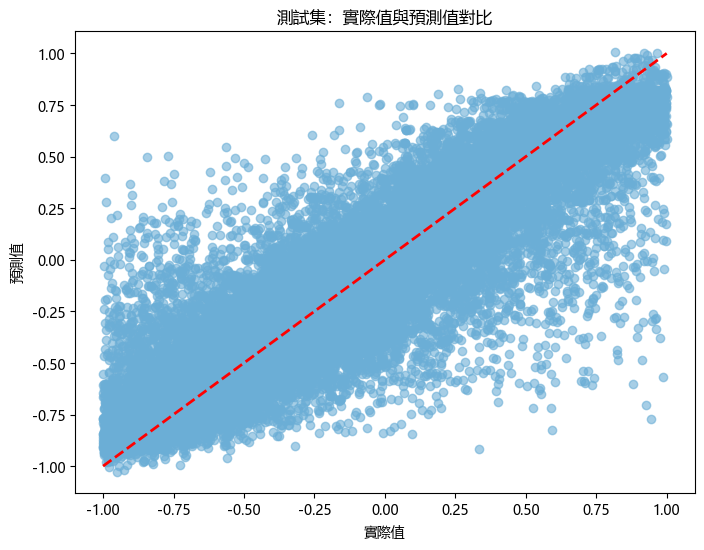

In [41]:
# 將模型設為評估模式，避免梯度更新
model.eval()

# 禁用梯度計算，避免不必要的記憶體消耗
with torch.no_grad():
    # 將預測結果從 Tensor 轉為 NumPy 陣列
    y_test_pred = model(x_test_).cpu().numpy()

# 確保 y_test 已是 NumPy 陣列，若是 Tensor 則轉換
if isinstance(y_test, torch.Tensor):
    y_test_actual = y_test.numpy()
else:
    y_test_actual = y_test

# 反標準化處理
# y_test_pred = scaler.inverse_transform(y_test_pred)
# y_test_actual = scaler.inverse_transform(y_test_actual)

# **計算 MAE 和 R²**
mae = mean_absolute_error(y_test_actual, y_test_pred)
r2 = r2_score(y_test_actual, y_test_pred)

print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# **繪製結果**
import seaborn as sns

# 計算誤差
errors = y_test_actual - y_test_pred

# 繪製散點圖，展示實際值與預測值的對比
plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_test_pred, alpha=0.6, color=color2)  # alpha 控制透明度
plt.plot(
    [y_test_actual.min(), y_test_actual.max()],
    [y_test_actual.min(), y_test_actual.max()],
    "r--",
    lw=2,
)  # 對角線

# 設定圖表標題和軸標籤
plt.title("測試集：實際值與預測值對比")
plt.xlabel("實際值")
plt.ylabel("預測值")

# 顯示圖表
plt.show()

In [42]:
from datetime import timedelta

# 反標準化處理
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_actual = scaler.inverse_transform(y_test_actual)

# === 進行未來 6 個月的預測（保持標準化狀態） ===
# 假設測試集的日期是按順序對應原始資料集中的日期範圍
test_dates = df.iloc[-len(y_test_actual):]["交易年月日"].reset_index(drop=True)

# 建立 DataFrame 來保存實際值和預測值
results = pd.DataFrame({
    "Date": test_dates,
    "Actual": y_test_actual.flatten(),
    "Predicted": y_test_pred.flatten(),
})

# === 後續的未來 6 個月的預測 ===
input_seq = x_test[-1, :].reshape(1, 1, -1)  # 調整為 (1, 1, feature_dim)
future_predictions = []

for i in range(6):
    input_seq_tensor = torch.FloatTensor(input_seq).to(device)
    with torch.no_grad():
        next_pred = model(input_seq_tensor).cpu().numpy()

    next_pred = next_pred.flatten()[0]  # 不進行反標準化，保持標準化狀態
    future_predictions.append(next_pred)

    input_seq = np.roll(input_seq, -1, axis=1)
    input_seq[0, 0, -1] = next_pred  # 使用標準化的預測值更新序列

# === 對未來的預測結果進行滑動平均 ===
window_size = 10  # 設置滑動窗口大小
smoothed_predictions = pd.Series(future_predictions).rolling(window=window_size, min_periods=1).mean()

# === 最後進行反標準化 ===
smoothed_predictions = scaler.inverse_transform(np.array(smoothed_predictions).reshape(-1, 1)).flatten()

# === 建立未來 6 個月的日期範圍 ===
last_date = results["Date"].iloc[-1]
future_dates = [last_date + timedelta(days=30 * (i + 1)) for i in range(6)]

# 保存未來 6 個月的平滑後的預測結果
future_results = pd.DataFrame({"Date": future_dates, "Predicted": smoothed_predictions})

# 合併實際與未來預測的結果
all_results = pd.concat([results, future_results], ignore_index=True)

# === 按月份計算平均房價 ===
all_results["YearMonth"] = all_results["Date"].dt.to_period("M")
monthly_avg = all_results.groupby("YearMonth").mean()

print(monthly_avg.tail(10))

                                   Date         Actual      Predicted
YearMonth                                                            
2024-05   2024-05-14 04:47:20.442579200  185150.051971  188220.671084
2024-06   2024-06-15 22:10:51.789473792  185612.352892  188485.926353
2024-07   2024-07-14 07:39:29.049373696  185374.975960  188204.074550
2024-08   2024-08-06 19:48:20.970873856  185251.730195  185792.672924
2024-09   2024-09-28 00:00:00.000000000            NaN  269405.941819
2024-10   2024-10-28 00:00:00.000000000            NaN  268050.268389
2024-11   2024-11-27 00:00:00.000000000            NaN  267610.466997
2024-12   2024-12-27 00:00:00.000000000            NaN  267390.455645
2025-01   2025-01-26 00:00:00.000000000            NaN  267258.450905
2025-02   2025-02-25 00:00:00.000000000            NaN  267170.447745


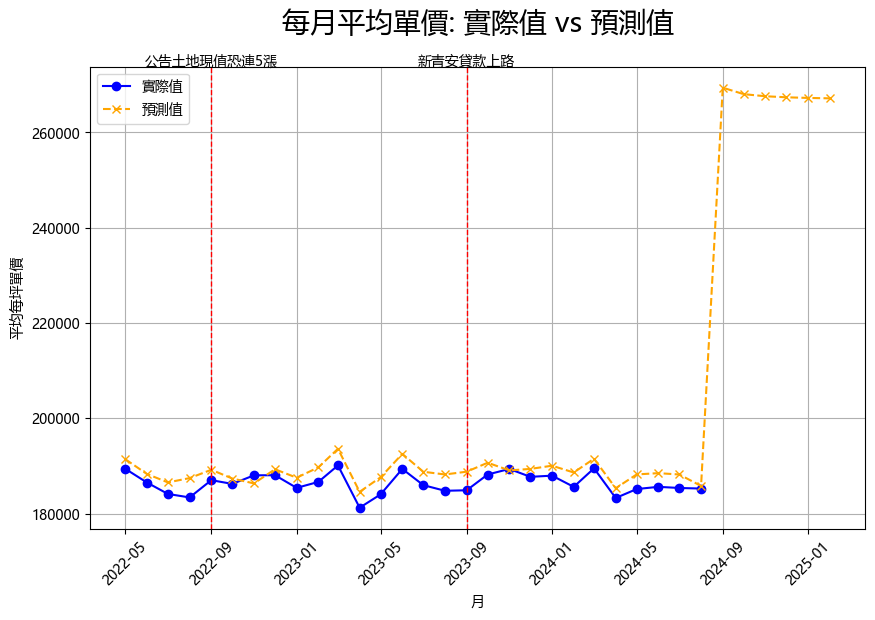

In [43]:
# === 繪製按月份的平均房價折線圖 ===
plt.figure(figsize=(10, 6))
plt.plot(
    monthly_avg.index.to_timestamp(),
    monthly_avg["Actual"],
    label="實際值",
    marker="o",
    linestyle="-",
    color="blue",
)
plt.plot(
    monthly_avg.index.to_timestamp(),
    monthly_avg["Predicted"],
    label="預測值",
    marker="x",
    linestyle="--",
    color="orange",
)

plt.title("每月平均單價: 實際值 vs 預測值", fontsize=20, pad=25)
plt.xlabel("月")
plt.ylabel("平均每坪單價")
plt.xticks(rotation=45)
plt.legend()

events = [("公告土地現值恐連5漲", "2022-09-01"), ("新青安貸款上路", "2023-09-01")]

for event, date in events:
    event_date = pd.to_datetime(date)
    plt.axvline(x=event_date, color="red", linestyle="--", linewidth=1)
    plt.annotate(
        event,
        xy=(event_date, plt.ylim()[1] * 1.00001),
        xytext=(event_date, plt.ylim()[1] * 1.001),
        ha="center",
        fontsize=10,
    )

plt.grid(True)
plt.show()

In [44]:
torch.save(model, "LSTM_model1101.pth")

In [45]:
# # 展示 20 種顏色
# fig, ax = plt.subplots(figsize=(10, 2))
# for i in range(20):
#     ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=cmap(i / 20)))
# ax.set_xlim(0, 20)
# ax.set_yticks([])
# ax.set_xticks(range(20))
# ax.set_xticklabels([f"{cmap(i / 20)}" for i in range(20)], rotation=45, ha="right", fontsize=10)
# plt.title("Colors in tab20c colormap")
# plt.show()